# Import Librairies

In [635]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import shapiro
from scipy.stats import wilcoxon


# Ayiti Analytics Probability and Statistics Project

Use all the files to have a final datasets to have the following columns
   <ul>
    <li>questid</li>
    <li>gender</li>
    <li>age (age of applicant)</li>
    <li>communeName (use data prep in commune file)</li>
    <li>application_date (created at in quest file)</li>
    <li>enroll_date (created_at in enroll file)</li>
    <li>is_enroll (Yes/No) (use data prep in enroll file)</li>
    <li>Education Level</li>
   <li>Communication channels(hear_AA1)</li>
    <li>Bootcamp Insterest (after_AA)</li>
    <li>Payement Date (use ord and transaction files)</li>
    <li>Payed (Yes/No)</li>
    <li>list Technologies as columns based (use get_dummies)</li>
    <li>list  Study domains (use get_dummies)</li>
    <li>Job is formal</li>
    <li>Have computer at home</li>
    <li>Have internet at home</li>
    
   </ul>
   

In [636]:
commune=pd.read_excel("commune.xlsx")
enroll = pd.read_csv("enroll.csv")
quest = pd.read_csv("quest.csv")
industry = pd.read_csv("industry.csv")
ord = pd.read_csv("ord.csv")
study_domain = pd.read_csv("study_domain.csv")
transaction = pd.read_csv("transaction.csv")
technology = pd.read_csv("technology.csv")

In [637]:
quest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          250 non-null    int64 
 1   gender              250 non-null    object
 2   dob                 244 non-null    object
 3   commune             250 non-null    object
 4   created_at          250 non-null    object
 5   modified_at         250 non-null    object
 6   department          249 non-null    object
 7   education_level     250 non-null    object
 8   university          250 non-null    object
 9   study_domain        250 non-null    object
 10  current_employed    250 non-null    object
 11  formal_sector_job   250 non-null    object
 12  have_computer_home  250 non-null    object
 13  internet_at_home    250 non-null    object
 14  hear_AA_1           250 non-null    object
 15  after_AA            250 non-null    object
 16  quest_id            250 no

In [638]:
quest['department'] = quest['department'].apply(lambda x  : str(x))
quest['department']= quest['department'].apply(lambda x : x.upper())
quest['commune']= quest['commune'].apply(lambda x : x.upper())
quest

first_tab=pd.merge(quest,commune, how = 'left', left_on=['department','commune'], right_on=['ADM1_PCODE','Commune_Id'])
first_tab.head()

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,...,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id,Commune_en,Commune_FR,Commune_Id,Departement,ADM1_PCODE
0,0,male,25/08/1998,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],...,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,NaN,NaN,NaN,NaN,NaN
1,1,female,29/09/1996,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,['other'],...,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01
2,2,male,17/05/1996,HT0111,2021-02-16T16:56:30.579504Z,2021-02-16T16:56:30.579563Z,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],...,Yes,Yes,Friend,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01
3,3,male,24/11/1996,HT0111,2021-02-16T16:57:55.754541Z,2021-02-16T16:57:55.754582Z,HT01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",...,Yes,Yes,ESIH,Improving my data analysis skills,905e4cf5-ce95-11eb-96a9-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01
4,4,male,20/07/1997,HT0111,2021-02-16T17:05:40.907948Z,2021-02-16T17:05:40.907982Z,HT01,High School (16 years),unknown,['other'],...,Yes,Yes,WhatsApp,Mentorship,905e73fd-ce95-11eb-a7b0-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01


In [639]:

transaction['Paid'] = 'Yes'
ord['Paid'] = 'Yes'

x = transaction.loc[:,['Paid','user_id','created_at']]
y = ord.loc[:,['Paid','user_id','created_at']]
trans_ord= pd.concat([x,y],axis=0)
trans_ord= trans_ord.rename(columns={'created_at': 'Payment_Date'})
trans_ord.head()

,Paid,user_id,Payment_Date
0,Yes,40976440,2021-03-08T05:08:50.832Z
1,Yes,41179271,2021-03-08T17:26:35.841Z
2,Yes,40973512,2021-03-08T18:52:09.147Z
3,Yes,41177453,2021-03-08T19:06:32.837Z
4,Yes,40797121,2021-03-08T22:10:00.796Z


In [640]:
enroll.head()
enroll= enroll.rename(columns={'created_at': 'enroll_date'})
enroll['is_enroll'] = 'Yes'

scnd_tab=pd.merge(enroll,trans_ord, how = 'left',on = ['user_id'] )
scnd_tab= scnd_tab.loc[:,['user_id','quest_id','enroll_date','Paid','Payment_Date','is_enroll']]
scnd_tab

third_tab=pd.merge(left=first_tab,right=scnd_tab, how = 'left', on=['quest_id'])
third_tab['is_enroll']= third_tab['is_enroll'].fillna('no')
third_tab['Paid']= third_tab['Paid'].fillna('no')
third_tab.head()

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,...,Commune_en,Commune_FR,Commune_Id,Departement,ADM1_PCODE,user_id,enroll_date,Paid,Payment_Date,is_enroll
0,0,male,25/08/1998,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],...,NaN,NaN,NaN,NaN,NaN,39726355.0,2021-02-14T23:15:19.500Z,no,NaN,Yes
1,1,female,29/09/1996,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,['other'],...,Port-au-Prince,Port-au-Prince,HT0111,West,HT01,NaN,NaN,no,NaN,no
2,2,male,17/05/1996,HT0111,2021-02-16T16:56:30.579504Z,2021-02-16T16:56:30.579563Z,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],...,Port-au-Prince,Port-au-Prince,HT0111,West,HT01,40117659.0,2021-02-20T21:20:37.450Z,Yes,2021-03-03T23:00:11.974Z,Yes
3,3,male,24/11/1996,HT0111,2021-02-16T16:57:55.754541Z,2021-02-16T16:57:55.754582Z,HT01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",...,Port-au-Prince,Port-au-Prince,HT0111,West,HT01,NaN,NaN,no,NaN,no
4,4,male,20/07/1997,HT0111,2021-02-16T17:05:40.907948Z,2021-02-16T17:05:40.907982Z,HT01,High School (16 years),unknown,['other'],...,Port-au-Prince,Port-au-Prince,HT0111,West,HT01,NaN,NaN,no,NaN,no


In [641]:
study_domain1 = pd.get_dummies(data=study_domain[["quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
study_domain1=study_domain1.groupby("quest_id").sum()
study_domain1
fourth_tab=pd.merge(left=third_tab,right=study_domain1, how = 'left', on=['quest_id'])
fourth_tab

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,...,is_enroll,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,other
0,0,male,25/08/1998,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,female,29/09/1996,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,['other'],...,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,male,17/05/1996,HT0111,2021-02-16T16:56:30.579504Z,2021-02-16T16:56:30.579563Z,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,male,24/11/1996,HT0111,2021-02-16T16:57:55.754541Z,2021-02-16T16:57:55.754582Z,HT01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",...,no,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,male,20/07/1997,HT0111,2021-02-16T17:05:40.907948Z,2021-02-16T17:05:40.907982Z,HT01,High School (16 years),unknown,['other'],...,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,male,15/02/1994,HT0621,2021-03-02T18:39:19.873194Z,2021-03-02T18:39:19.873237Z,HT06,Bachelors (bacc +4),other,['other'],...,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
246,246,male,08/10/1990,HT0621,2021-03-10T04:12:49.436154Z,2021-03-10T04:12:49.436213Z,HT06,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),['item8'],...,no,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
247,247,male,28/12/1993,HT0621,2021-03-14T15:29:32.474015Z,2021-03-14T15:29:32.474055Z,HT06,Bachelors (bacc +4),Centre de Techniques de Planification et d'Eco...,['item2'],...,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
248,248,male,17/04/1992,HT0412,2021-03-08T16:35:07.806100Z,2021-03-08T16:35:07.806161Z,HT04,Bachelors (bacc +4),other,['item1'],...,Yes,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [642]:
technologyy = pd.get_dummies(data=technology[["quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
technologyyy=technologyy.groupby("quest_id").sum()
technologyyy
fifth_tab=pd.merge(left=fourth_tab,right=technologyyy, how = 'left', on=['quest_id'])
fifth_tab
fifth_tab.columns
columns_drop= ['Unnamed: 0','modified_at','current_employed','Commune_Id','Commune_FR','ADM1_PCODE','study_domain','department','university','commune']
final_tab= fifth_tab.drop(labels=None,columns=columns_drop, level=None, inplace=False)
fifth_tab.columns

Index(['Unnamed: 0', 'gender', 'dob', 'commune', 'created_at', 'modified_at',
       'department', 'education_level', 'university', 'study_domain',
       'current_employed', 'formal_sector_job', 'have_computer_home',
       'internet_at_home', 'hear_AA_1', 'after_AA', 'quest_id', 'Commune_en',
       'Commune_FR', 'Commune_Id', 'Departement', 'ADM1_PCODE', 'user_id',
       'enroll_date', 'Paid', 'Payment_Date', 'is_enroll', 'Accounting',
       'Computer Science', 'Economics', 'Electrical Engineering', 'Law',
       'Management', 'Medicine', 'Statistics', 'other_x', 'Bash', 'Excel',
       'Git', 'Java', 'JavaScript', 'PHP', 'PowerBI or Tableau', 'Python', 'R',
       'SQL', 'VBA', 'other_y'],
      dtype='object')

In [643]:
# Function to create the Age column

final_tab['dob'] = final_tab['dob'].astype(str)

final_tab['dob'].replace({'3 aout 1977':'03/08/1977'},inplace = True)
final_tab['dob'] = pd.to_datetime(final_tab['dob'])

def Calculate_Age(born) :
    today = date(2021, 6, 18)
    return today.year - born.year - ((today.month,today.day)< (born.month,born.day))

final_tab['Age'] = final_tab['dob'].apply(Calculate_Age)
final_tab
lisst=['created_at','enroll_date','Payment_Date']
for i in lisst:
    final_tab[i] =final_tab[i].apply(lambda x : str(x).split("T")[0])

final_tab.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   gender                  250 non-null    object        
 1   dob                     244 non-null    datetime64[ns]
 2   created_at              250 non-null    object        
 3   education_level         250 non-null    object        
 4   formal_sector_job       250 non-null    object        
 5   have_computer_home      250 non-null    object        
 6   internet_at_home        250 non-null    object        
 7   hear_AA_1               250 non-null    object        
 8   after_AA                250 non-null    object        
 9   quest_id                250 non-null    object        
 10  Commune_en              248 non-null    object        
 11  Departement             248 non-null    object        
 12  user_id                 102 non-null    float64   

In [644]:
# replace the missing values by 0.00
cols=final_tab.iloc[:,16:].columns
for i in cols:
    final_tab[i]= final_tab[i].fillna(0.0)
final_tab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   gender                  250 non-null    object        
 1   dob                     244 non-null    datetime64[ns]
 2   created_at              250 non-null    object        
 3   education_level         250 non-null    object        
 4   formal_sector_job       250 non-null    object        
 5   have_computer_home      250 non-null    object        
 6   internet_at_home        250 non-null    object        
 7   hear_AA_1               250 non-null    object        
 8   after_AA                250 non-null    object        
 9   quest_id                250 non-null    object        
 10  Commune_en              248 non-null    object        
 11  Departement             248 non-null    object        
 12  user_id                 102 non-null    float64   

In [645]:
final_tab['Age'].dtype

dtype('float64')

In [646]:
final_tab['Age'] = final_tab['Age'].astype(float)

In [647]:
final_tab['Age'].dtype

dtype('float64')

In [648]:
# In the Bootcamp, the age requirement is at least 18 years old. We will display the values of the column Age

final_tab['Age'].value_counts()

 25.0    27
 23.0    23
 26.0    23
 24.0    22
 22.0    19
 27.0    17
 30.0    14
 28.0    14
 29.0    12
 32.0     9
 0.0      9
 21.0     8
 33.0     7
 34.0     7
 31.0     5
 37.0     5
 20.0     4
 38.0     4
 40.0     4
-1.0      3
 44.0     3
 19.0     2
 35.0     2
 46.0     1
 50.0     1
 39.0     1
 48.0     1
 1.0      1
 45.0     1
 36.0     1
Name: Age, dtype: int64

In [649]:
# Three ages are problematic: -1, 0, 1.

final_tab[(final_tab['Age'] == 1.0) | (final_tab['Age'] == 0) |(final_tab['Age'] == -1)][["education_level", "quest_id", "Age"]]

,education_level,quest_id,Age
25,High School (16 years),906036c8-ce95-11eb-8c78-7c67a234f601,0.0
35,Other,9060e347-ce95-11eb-abbb-7c67a234f601,0.0
58,Bachelors (bacc +4),906241d5-ce95-11eb-9850-7c67a234f601,0.0
92,Other,9064923b-ce95-11eb-a771-7c67a234f601,-1.0
116,Bachelors (bacc +4),9065822a-ce95-11eb-9df5-7c67a234f601,0.0
154,Bachelors (bacc +4),9066fab1-ce95-11eb-a4e2-7c67a234f601,0.0
176,Bachelors (bacc +4),9067e4c0-ce95-11eb-bebe-7c67a234f601,0.0
194,Bachelors (bacc +4),90691afb-ce95-11eb-a4c3-7c67a234f601,0.0
209,Other,9069a205-ce95-11eb-be5a-7c67a234f601,1.0
210,Other,9069a206-ce95-11eb-9c6f-7c67a234f601,0.0


In [650]:
#  We will store these observations in a variable: drop_data

drop_data = final_tab[(final_tab['Age'] == 1.0) | (final_tab['Age'] == 0) |(final_tab['Age'] == -1)]
drop_data

,gender,dob,created_at,education_level,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id,...,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,other_y,Age
25,male,2021-02-28,2021-02-19,High School (16 years),Yes,Yes,Yes,WhatsApp,Mentorship,906036c8-ce95-11eb-8c78-7c67a234f601,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,male,NaT,2021-02-23,Other,unknown,Yes,Yes,WhatsApp,Training to start my own company,9060e347-ce95-11eb-abbb-7c67a234f601,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
58,male,NaT,2021-03-14,Bachelors (bacc +4),unknown,Yes,Yes,ESIH,other,906241d5-ce95-11eb-9850-7c67a234f601,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
92,male,2021-08-14,2021-02-18,Other,unknown,Yes,Yes,Friend,Improving my data analysis skills,9064923b-ce95-11eb-a771-7c67a234f601,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0
116,female,NaT,2021-03-03,Bachelors (bacc +4),unknown,Yes,Yes,Friend,Improving my data analysis skills,9065822a-ce95-11eb-9df5-7c67a234f601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154,female,NaT,2021-02-18,Bachelors (bacc +4),unknown,Yes,Yes,Facebook,Finding a job/internship,9066fab1-ce95-11eb-a4e2-7c67a234f601,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176,male,2021-02-18,2021-02-19,Bachelors (bacc +4),unknown,Yes,No,WhatsApp,Training to start my own company,9067e4c0-ce95-11eb-bebe-7c67a234f601,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
194,male,NaT,2021-02-16,Bachelors (bacc +4),unknown,Yes,Yes,WhatsApp,Training to start my own company,90691afb-ce95-11eb-a4c3-7c67a234f601,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
209,female,2020-01-22,2021-02-16,Other,unknown,No,No,WhatsApp,Improving my data analysis skills,9069a205-ce95-11eb-be5a-7c67a234f601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
210,female,2021-05-08,2021-02-17,Other,unknown,Yes,Yes,ESIH,Improving my data analysis skills,9069a206-ce95-11eb-9c6f-7c67a234f601,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [651]:
# We remove these 13 observations from the final_tab dataframe
# We re-post another index

final_tab_OK = final_tab.drop(index = drop_data.index).reset_index()
final_tab_OK

,index,gender,dob,created_at,education_level,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,...,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,other_y,Age
0,0,male,1998-08-25,2021-02-14,unknown,unknown,unknown,unknown,unknown,unknown,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
1,1,female,1996-09-29,2021-02-16,Bachelors (bacc +4),unknown,Yes,Yes,Friend,Finding a job/internship,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,24.0
2,2,male,1996-05-17,2021-02-16,Bachelors (bacc +4),unknown,Yes,Yes,Friend,Improving my data analysis skills,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,25.0
3,3,male,1996-11-24,2021-02-16,Bachelors (bacc +4),unknown,Yes,Yes,ESIH,Improving my data analysis skills,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,24.0
4,4,male,1997-07-20,2021-02-16,High School (16 years),unknown,Yes,Yes,WhatsApp,Mentorship,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,245,male,1994-02-15,2021-03-02,Bachelors (bacc +4),Yes,Yes,Yes,Facebook,Improving my data analysis skills,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0
233,246,male,1990-08-10,2021-03-10,Bachelors (bacc +4),Yes,Yes,Yes,Friend,Improving my data analysis skills,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,30.0
234,247,male,1993-12-28,2021-03-14,Bachelors (bacc +4),Yes,Yes,Yes,Friend,Improving my data analysis skills,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,27.0
235,248,male,1992-04-17,2021-03-08,Bachelors (bacc +4),unknown,Yes,Yes,Facebook,Improving my data analysis skills,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29.0


In [653]:
# The shape of final_tab_OK is 237
final_tab_OK.shape

(237, 40)

In [655]:
# We calculate the average Age of this new dataframe

mean_data_without_13 = final_tab_OK['Age'].mean()
mean_data_without_13

27.544303797468356

In [690]:
# We assimilate this average Age to that of drop_data 
drop_data['Age'] = mean_data_without_13

In [691]:
drop_data['Age']

25     27.544304
35     27.544304
58     27.544304
92     27.544304
116    27.544304
154    27.544304
176    27.544304
194    27.544304
209    27.544304
210    27.544304
219    27.544304
221    27.544304
229    27.544304
Name: Age, dtype: float64

In [723]:
final_tab_OK.shape

(237, 40)

In [724]:
drop_data.shape

(13, 39)

In [725]:
# We concatenate the two dataframes
# The average age will remain the same

final_tab = pd.concat([final_tab_OK,drop_data], axis =0 )
final_tab.shape

(250, 40)

In [726]:
final_tab['Age']

0      22.000000
1      24.000000
2      25.000000
3      24.000000
4      23.000000
         ...    
209    27.544304
210    27.544304
219    27.544304
221    27.544304
229    27.544304
Name: Age, Length: 250, dtype: float64

In [727]:
# We reinitialize the index
final_tab.reset_index()

,level_0,index,gender,dob,created_at,education_level,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,...,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,other_y,Age
0,0,0.0,male,1998-08-25,2021-02-14,unknown,unknown,unknown,unknown,unknown,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.000000
1,1,1.0,female,1996-09-29,2021-02-16,Bachelors (bacc +4),unknown,Yes,Yes,Friend,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,24.000000
2,2,2.0,male,1996-05-17,2021-02-16,Bachelors (bacc +4),unknown,Yes,Yes,Friend,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,25.000000
3,3,3.0,male,1996-11-24,2021-02-16,Bachelors (bacc +4),unknown,Yes,Yes,ESIH,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,24.000000
4,4,4.0,male,1997-07-20,2021-02-16,High School (16 years),unknown,Yes,Yes,WhatsApp,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,23.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,209,NaN,female,2020-01-22,2021-02-16,Other,unknown,No,No,WhatsApp,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.544304
246,210,NaN,female,2021-05-08,2021-02-17,Other,unknown,Yes,Yes,ESIH,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,27.544304
247,219,NaN,male,2021-07-25,2021-02-19,Bachelors (bacc +4),unknown,Yes,Yes,Facebook,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,27.544304
248,221,NaN,male,NaT,2021-02-19,High School (16 years),unknown,Yes,Yes,LinkedIn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.544304


In [754]:
final_tab_OK['Age'].mean()

27.544303797468356

In [728]:
move = final_tab.pop('Age')
final_tab.insert(2,'Age',move)
final_tab['Age'] = final_tab['Age'].fillna(final_tab['Age'].mean())
final_tab['Age'] = final_tab['Age'].astype(int)
final_tab = final_tab.drop(columns=['user_id','dob'],axis=1)
final_tab

,index,gender,Age,created_at,education_level,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,...,Git,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,other_y
0,0.0,male,22,2021-02-14,unknown,unknown,unknown,unknown,unknown,unknown,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,female,24,2021-02-16,Bachelors (bacc +4),unknown,Yes,Yes,Friend,Finding a job/internship,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2.0,male,25,2021-02-16,Bachelors (bacc +4),unknown,Yes,Yes,Friend,Improving my data analysis skills,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,3.0,male,24,2021-02-16,Bachelors (bacc +4),unknown,Yes,Yes,ESIH,Improving my data analysis skills,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4.0,male,23,2021-02-16,High School (16 years),unknown,Yes,Yes,WhatsApp,Mentorship,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,NaN,female,27,2021-02-16,Other,unknown,No,No,WhatsApp,Improving my data analysis skills,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
210,NaN,female,27,2021-02-17,Other,unknown,Yes,Yes,ESIH,Improving my data analysis skills,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
219,NaN,male,27,2021-02-19,Bachelors (bacc +4),unknown,Yes,Yes,Facebook,Finding a job/internship,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
221,NaN,male,27,2021-02-19,High School (16 years),unknown,Yes,Yes,LinkedIn,Improving my data analysis skills,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###  1. How many observations and variables are there in the dataset
 

In [729]:

final_tab.shape
print('The number of observations in the dataset is:',final_tab.shape[0])
print('The number of variables in the dataset is:',final_tab.shape[1])

The number of observations in the dataset is: 250
The number of variables in the dataset is: 38


### 2.A Calculate the average age of the observations
   * On the whole dataset
   * On the whole male dataset
   * On all the female dataset
### 2.B Calculate 
   * variance of the whole datatset,male and female
   * kurtosis of the whole datatset,male and female
   * skewness of the whole datatset,male and female
### 2.C Does the age distribution follow a normal distribution 
   

In [730]:
# here your codes
avg=final_tab['Age'].mean()
print('The average age of the observations in the whole dataset is', np.round(avg,2), 'years old')
avg_male=final_tab[final_tab['gender']== 'male'].Age.mean()
print('The average age of the observations for the male is', np.round(avg_male,2), 'years old')
avg_female=final_tab[final_tab['gender']== 'female'].Age.mean()
print('The average age of the observations for the female is', np.round(avg_female,2), 'years old','\n')

var=final_tab['Age'].var()
print('The age variance of the observations in the whole dataset is', np.round(var,2))
var_male=final_tab[final_tab['gender']== 'male'].Age.var()
print('The age variance of the observations for the male is', np.round(var_male,2))
var_female=final_tab[final_tab['gender']== 'female'].Age.var()
print('The age variance  of the observations for the female is', np.round(var_female,2),'\n')

kurtosis=final_tab['Age'].kurtosis()
print('The kurtosis of the age distribution the whole dataset is', np.round(kurtosis,2))
kurtosis_male=final_tab[final_tab['gender']== 'male'].Age.kurtosis()
print('The kurtosis of the age distribution for the male is', np.round(kurtosis_male,2))
kurtosis_female=final_tab[final_tab['gender']== 'female'].Age.kurtosis()
print('The kurtosis of the age distributionfor the female is', np.round(kurtosis_female,2),'\n')

skewness=final_tab['Age'].skew()
print('The skewness age of the distribution in the whole dataset is', np.round(skewness,2))
skewness_male=final_tab[final_tab['gender']== 'male'].Age.skew()
print('The skewness age of the distribution for the male is', np.round(skewness_male,2))
skewness_female=final_tab[final_tab['gender']== 'female'].Age.skew()
print('The skewness age of the distribution for the female is', np.round(skewness_female,2),'\n')

The average age of the observations in the whole dataset is 27.52 years old
The average age of the observations for the male is 27.74 years old
The average age of the observations for the female is 26.53 years old 

The age variance of the observations in the whole dataset is 29.48
The age variance of the observations for the male is 29.72
The age variance  of the observations for the female is 27.86 

The kurtosis of the age distribution the whole dataset is 2.51
The kurtosis of the age distribution for the male is 2.36
The kurtosis of the age distributionfor the female is 4.29 

The skewness age of the distribution in the whole dataset is 1.44
The skewness age of the distribution for the male is 1.37
The skewness age of the distribution for the female is 1.92 



In [731]:
# Let "s check if the Age distribution is normal

print("Shapiro-Wilk Test for whole dataset: ",shapiro(final_tab['Age']))
print("Shapiro-Wilk Test for whole dataset: ",shapiro(final_tab[final_tab['gender']== 'male'].Age))
print("Shapiro-Wilk Test for whole dataset: ",shapiro(final_tab[final_tab['gender']== 'female'].Age))

Shapiro-Wilk Test for whole dataset:  ShapiroResult(statistic=0.8862147331237793, pvalue=9.421861077787974e-13)
Shapiro-Wilk Test for whole dataset:  ShapiroResult(statistic=0.8981670141220093, pvalue=1.5403946174163963e-10)
Shapiro-Wilk Test for whole dataset:  ShapiroResult(statistic=0.8017899990081787, pvalue=1.7407170389560633e-06)


### 3.Display the age frequency disbrution
   * On the whole dataset
   * On the whole male dataset
   * On all the female dataset

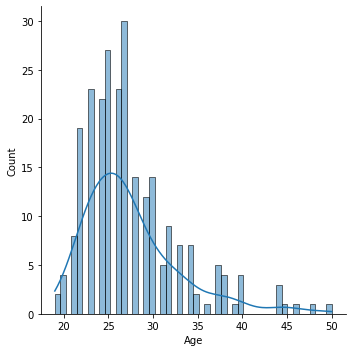

In [732]:
# Display the age frequency disbrution on the whole dataset

bins = 50
sns.displot(final_tab['Age'],bins = bins,kde = True)

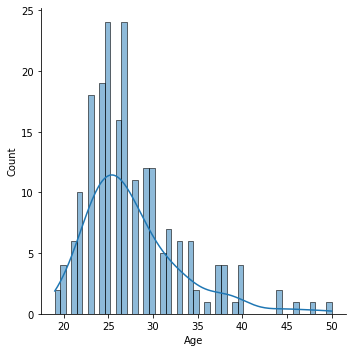

In [733]:
# Display the age frequency disbrution on the male dataset

sns.displot(final_tab[final_tab['gender']== 'male'].Age, bins = bins,kde = True)

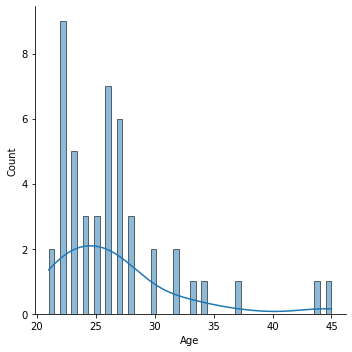

In [734]:
# Display the age frequency disbrution on the female dataset

sns.displot(final_tab[final_tab['gender']== 'female'].Age,bins= bins,kde = True)

### 4. Can we say that the average age (24 years old) of the observations can be considered as the average age of the population likely to participate in this bootcamp. Justify your answer

In [735]:
#here your codes
# H0 : Mu - 24 = 0 
# H1 : Mu - 24!= 0



stat, p = wilcoxon(final_tab.Age - 24)
print('Statistics=%.2f, p=%.2f' % (stat, p))


# Decision rule

alpha = 0.05
if p > alpha:
	print('Fail to reject H0')
else:
	print('Reject H0')

Statistics=3706.00, p=0.00
h1 mu!= 24 (reject H0)


### 5. Calculate the average age of participants for each communication channel

In [ ]:
display( final_tab['Age'].groupby(by= final_tab['hear_AA_1']).mean())

### 6. Display an age boxplot for each communication channel

Text(0.5, 1.0, 'Boxplot of applicants by communication channels')

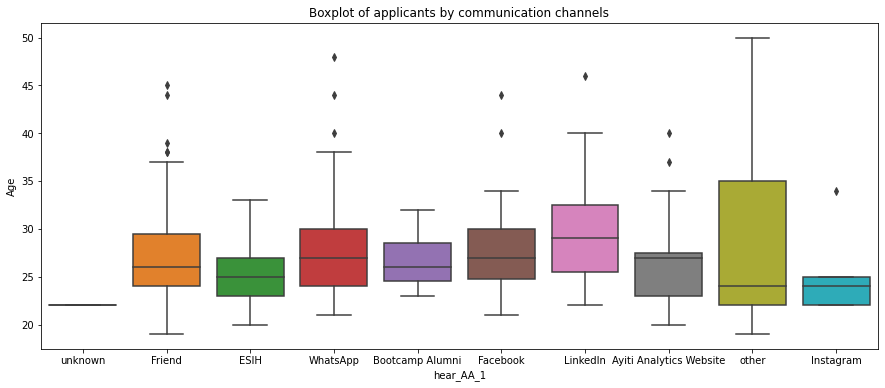

In [736]:

plt.figure(figsize=(15,6))
sns.boxplot(data=final_tab,x="hear_AA_1",y="Age")
plt.title('Age boxplot for each communication channel')

### 7 .Is there a significant age difference between these groups

In [738]:
# We put in variable the values of each group
# Then we do the ANOVA test

Facebook_list_age = final_tab[final_tab['hear_AA_1'] == 'Facebook']['Age'].values
Unknown_list_age = final_tab[final_tab['hear_AA_1'] == 'unknown']['Age'].values
Friend_list_age = final_tab[final_tab['hear_AA_1'] == 'Friend']['Age'].values
ESIH_list_age = final_tab[final_tab['hear_AA_1'] == 'ESIH']['Age'].values
WhatsApp_list_age = final_tab[final_tab['hear_AA_1'] == 'WhatsApp']['Age'].values
Bootcamp_Alumni_list_age = final_tab[final_tab['hear_AA_1'] == 'Bootcamp Alumni']['Age'].values
LinkedIn_list_age = final_tab[final_tab['hear_AA_1'] == 'LinkedIn']['Age'].values
Ayiti_Analytics_Website_list_age = final_tab[final_tab['hear_AA_1'] == 'Ayiti Analytics Website']['Age'].values
other_list_age = final_tab[final_tab['hear_AA_1'] == 'other']['Age'].values
Instagram_list_age = final_tab[final_tab['hear_AA_1'] == 'Instagram']['Age'].values




In [739]:
# Ho : There is no difference between the mean of these groups
# Ha : There is a difference between the mean of these groups

stat, p = f_oneway(Facebook_list_age, Unknown_list_age, Friend_list_age, ESIH_list_age, WhatsApp_list_age, Bootcamp_Alumni_list_age, LinkedIn_list_age, Ayiti_Analytics_Website_list_age, other_list_age, Instagram_list_age)
print(p)

# Decision Rule

if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")


0.3510287573324228
Hypothesis Accepted


### 8.Plan a BA strategy for each communication channel regarding the age group

In [740]:
#here your codes

### 9.According to the observations what is the probability of being in each channel of communication knowing your are a woman

In [741]:
# Before, we calculate the probabilities of being a man and of being a woman
res =final_tab.gender.value_counts(normalize=True).to_frame()
display(res)


gender_table = pd.pivot_table(final_tab,'Age',index='hear_AA_1',columns=['gender'],aggfunc = ['count'],fill_value=0)
my_pivot = gender_table.sort_values(by= ('count','female'),ascending = False)

my_pivot['Probabilty of being a woman and being in each communications channels'] =gender_table[('count','female')]/final_tab.shape[0]
my_pivot['Probabilty of being a man and being in each communications channels'] = gender_table[('count','male')]/final_tab.shape[0]
my_pivot=my_pivot.loc[:,['Probabilty of being a woman and being in each communications channels','Probabilty of being a man and being in each communications channels']]
display(my_pivot)

my_pivot['male'] =my_pivot['Probabilty of being a man and being in each communications channels']/ res.loc["male","gender"]
my_pivot['female'] =my_pivot['Probabilty of being a woman and being in each communications channels']/ res.loc["female","gender"]
my_pivot.loc[:,['female']]

,gender
male,0.812
female,0.188


,Probabilty of being female and being in each communications channels,Probabilty of being male and being in each communications channels
gender,,
hear_AA_1,,
Friend,0.044,0.224
WhatsApp,0.036,0.228
Bootcamp Alumni,0.032,0.024
Facebook,0.024,0.136
ESIH,0.020,0.052
Ayiti Analytics Website,0.016,0.044
other,0.008,0.028
Instagram,0.004,0.016


,female
gender,
hear_AA_1,
Friend,0.234043
WhatsApp,0.191489
Bootcamp Alumni,0.170213
Facebook,0.127660
ESIH,0.106383
Ayiti Analytics Website,0.085106
other,0.042553
Instagram,0.021277


### 10.According to the observations what is the probability of being in each channel of communication knowing your are a man

In [742]:
#here your codes
my_pivot.loc[:,['male']]

,male
gender,
hear_AA_1,
Friend,0.275862
WhatsApp,0.280788
Bootcamp Alumni,0.029557
Facebook,0.167488
ESIH,0.064039
Ayiti Analytics Website,0.054187
other,0.034483
Instagram,0.019704


### 11. Deduce the probability of being a woman knowing each communication channel

In [743]:
#here your codes
communication_table = pd.pivot_table(final_tab,'Age',index='hear_AA_1',columns='gender',aggfunc = ['count'],fill_value=0,margins = True)
v = communication_table.iloc[:-1,-1].to_frame()

v[('count','All')] = v[('count','All')]/final_tab.shape[0]
v['Probability of being in each channel of communication knowing your are a woman']= my_pivot.loc[:,['female']]
v['Probability of being a woman knowing each communication channels']= (v['Probability of being in each channel of communication knowing your are a woman'] * (0.188))/v[('count','All')]
v

,count,Probability of being in each channel of communication knowing your are a woman,Probability of being a female knowing each communication channels
,All,,
hear_AA_1,,,
Ayiti Analytics Website,0.060,0.085106,0.266667
Bootcamp Alumni,0.056,0.170213,0.571429
ESIH,0.072,0.106383,0.277778
Facebook,0.160,0.127660,0.150000
Friend,0.268,0.234043,0.164179
Instagram,0.020,0.021277,0.200000
LinkedIn,0.060,0.021277,0.066667
WhatsApp,0.264,0.191489,0.136364


### 12. Deduce the probability of being a man knowing each communication channel

In [744]:

v = communication_table.iloc[:-1,-1].to_frame()

v[('count','All')] = v[('count','All')]/final_tab.shape[0]
v['Probability of being in each channel of communication knowing your are a man']= my_pivot.loc[:,['male']]
v['Probability of being a man knowing each communication channels']= (v['Probability of being in each channel of communication knowing your are a man'] * (0.188))/v[('count','All')]
v


,count,Probability of being in each channel of communication knowing your are a man,Probability of being a male knowing each communication channels
,All,,
hear_AA_1,,,
Ayiti Analytics Website,0.060,0.054187,0.169787
Bootcamp Alumni,0.056,0.029557,0.099226
ESIH,0.072,0.064039,0.167214
Facebook,0.160,0.167488,0.196798
Friend,0.268,0.275862,0.193515
Instagram,0.020,0.019704,0.185222
LinkedIn,0.060,0.068966,0.216092
WhatsApp,0.264,0.280788,0.199955


### 15 Display a plot to see Gender vs Communication Channels .Is there any dependency between communication channels and gender?

In [745]:

com_table = pd.pivot_table(final_tab,'Age',index='hear_AA_1',columns=['after_AA'],aggfunc = ['count'],fill_value=0,margins = True)
com_table


stat, p, dof,s= chi2_contingency(com_table) 
print("p value: " + str(p))

# Decision Rule
if p <= 0.05: 
    print('Reject NULL HYPOTHESIS') 
else: 
    print('ACCEPT NULL HYPOTHESIS')

p value: 1.2931351228431785e-10
Reject NULL HYPOTHESIS


p value: 1.2931351228431785e-10
Reject NULL HYPOTHESIS


### 16 Use the same method to display plot and know if is there any dependency between communication channels and Bootcamp Insterest?

gender,female,male,All
hear_AA_1,,,
Ayiti Analytics Website,4,11,15
Bootcamp Alumni,8,6,14
ESIH,5,13,18
Facebook,6,34,40
Friend,11,56,67
Instagram,1,4,5
LinkedIn,1,14,15
WhatsApp,9,57,66
other,2,7,9


p value: 0.5496916447443122
ACCEPT NULL HYPOTHESIS


<Figure size 360x1080 with 0 Axes>

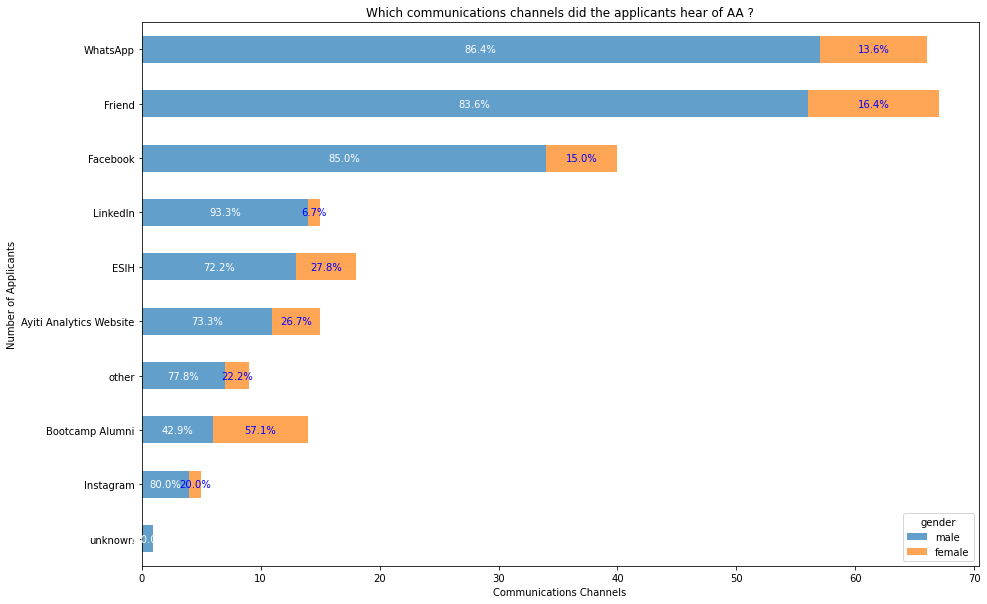

gender,female,male,All
hear_AA_1,,,
Ayiti Analytics Website,4,11,15
Bootcamp Alumni,8,6,14
ESIH,5,13,18
Facebook,6,34,40
Friend,11,56,67
Instagram,1,4,5
LinkedIn,1,14,15
WhatsApp,9,57,66
other,2,7,9


In [747]:
# We create a function to generate Chi-square tests

def my_chisqure_test(data=final_tab,columns=None,significance_level=0.05,figsize=(5,5),heatmap=False):
  result1  = pd.pivot_table(data=data,index=columns[0],columns=columns[1],values="Age",aggfunc="count",fill_value=0,margins = True)
  display(result1)
  stat, p, dof,s= chi2_contingency(result1) 
  print("p value: " + str(p)) 
  if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
  else: 
    print('ACCEPT NULL HYPOTHESIS') 


  # Force the aspect ratio of the blocks to be equal using "square" parameter
  plt.figure(figsize=figsize)
  if heatmap:
    ax = sns.heatmap(result1,cmap="YlGnBu", linewidths=.5,
    annot=True ,annot_kws={'size':14} ,fmt=".1f" , cbar=True ,square = True)
    plt.yticks(rotation=0)
  else:
    values = result1.iloc[:-1,:].sort_values(by =('male'),ascending=True)
    ax =values.sort_values(by =('male'),ascending=True)[[('male'),('female')]].plot(kind="barh",figsize=(15,10),stacked= True,alpha =0.7)
    ylab = ax.set_ylabel('Number of Applicants')
    xlab = ax.set_xlabel('Communications Channels')
    title = ax.set_title('Which communications channels did the applicants hear of AA ?')

    index =0
    for male, female ,total in zip(values[('male')],values[('female')], values[('All')]):
      if male != total and  female != total  :
        ax.text(male/2 ,
                index,
                str(np.round((male/total)*100,1)) + "%",
                fontdict=dict(color='white',fontsize=10,horizontalalignment="center",verticalalignment="center")
                )
        ax.text(male + female/2 ,
              index,
              str(np.round((female/total)*100,1)) + "%",
              fontdict=dict(color='blue',fontsize=10,horizontalalignment="center",verticalalignment="center")
            )
      elif female == total:
        ax.text(female/2 ,
            index,
            str(np.round((female/total)*100,1)) + "%",
            fontdict=dict(color='blue',fontsize=10,horizontalalignment="center",verticalalignment="center")
          )
      else:
        ax.text(male/2 ,
            index,
            str(np.round((male/total)*100,1)) + "%",
            fontdict=dict(color='white',fontsize=10,horizontalalignment="center",verticalalignment="center")
          )       
   
    
      index+=1
  plt.show()
  return result1
my_chisqure_test(final_tab,columns=['hear_AA_1','gender'],significance_level=0.05,figsize=(5,15),heatmap=False)  

### 17.Plan a BA  strategy for each communication channel, Bootcamp Insterest regarding the gender 

In [748]:
#here your codes

### 19. Calculate 
    * P(Bootcamp Insterest,Communication channels,Gender/Payed=yes)
    * P(Bootcamp Insterest,Communication channels,Gender/Payed=no)

In [749]:
# We create a pivot table with the 3 variables knowing that the filter Paid = Yes

result12  = pd.pivot_table(data=final_tab[final_tab['Paid'] == 'Yes'],columns='after_AA',index=['Paid','hear_AA_1','gender'],values="quest_id",aggfunc="count",fill_value=0,margins = True)
result12 = result12 /final_tab[final_tab['Paid'] == 'Yes'].shape[0]
result12

after_AA                             Finding a job/internship  \
Paid hear_AA_1               gender                             
Yes  Ayiti Analytics Website male                    0.015385   
     Bootcamp Alumni         female                  0.015385   
                             male                    0.000000   
     ESIH                    male                    0.015385   
     Facebook                female                  0.000000   
                             male                    0.015385   
     Friend                  female                  0.015385   
                             male                    0.030769   
     Instagram               male                    0.015385   
     LinkedIn                female                  0.000000   
                             male                    0.015385   
     WhatsApp                female                  0.015385   
                             male                    0.046154   
     other                   female                  0.000000   
                             male                    0.000000   
All                                                  0.200000   

after_AA                             Improving my data analysis skills  \
Paid hear_AA_1               gender                                      
Yes  Ayiti Analytics Website male                             0.015385   
     Bootcamp Alumni         female                           0.015385   
                             male                             0.076923   
     ESIH                    male                             0.030769   
     Facebook                female                           0.030769   
                             male                             0.076923   
     Friend                  female                           0.030769   
                             male                             0.215385   
     Instagram               male                             0.000000   
     LinkedIn                female                           0.015385   
                             male                             0.015385   
     WhatsApp                female                           0.046154   
                             male                             0.046154   
     other                   female                           0.000000   
                             male                             0.015385   
All                                                           0.630769   

after_AA                             Mentorship  Switching careers  \
Paid hear_AA_1               gender                                  
Yes  Ayiti Analytics Website male      0.000000           0.000000   
     Bootcamp Alumni         female    0.000000           0.015385   
                             male      0.000000           0.000000   
     ESIH                    male      0.000000           0.000000   
     Facebook                female    0.000000           0.000000   
                             male      0.000000           0.000000   
     Friend                  female    0.000000           0.000000   
                             male      0.000000           0.000000   
     Instagram               male      0.000000           0.000000   
     LinkedIn                female    0.000000           0.000000   
                             male      0.000000           0.000000   
     WhatsApp                female    0.000000           0.000000   
                             male      0.000000           0.000000   
     other                   female    0.015385           0.000000   
                             male      0.000000           0.000000   
All                                    0.015385           0.015385   

after_AA                             Training to start my own company  \
Paid hear_AA_1               gender                                     
Yes  Ayiti Analytics Website male                            0.015385   
     Bootcamp Al

In [750]:
# We create a pivot table with the 3 variables knowing that the filter Paid = no

result123  = pd.pivot_table(data=final_tab[final_tab['Paid'] == 'no'],columns='after_AA',index=['Paid','hear_AA_1','gender'],values="quest_id",aggfunc="count",fill_value=0,margins = True)
result123 = result123 /final_tab[final_tab['Paid'] == 'no'].shape[0]
result123

after_AA                             Finding a job/internship  \
Paid hear_AA_1               gender                             
no   Ayiti Analytics Website female                  0.000000   
                             male                    0.000000   
     Bootcamp Alumni         female                  0.010811   
                             male                    0.000000   
     ESIH                    female                  0.000000   
                             male                    0.005405   
     Facebook                female                  0.010811   
                             male                    0.037838   
     Friend                  female                  0.016216   
                             male                    0.021622   
     Instagram               female                  0.000000   
                             male                    0.005405   
     LinkedIn                male                    0.005405   
     WhatsApp                female                  0.000000   
                             male                    0.037838   
     other                   female                  0.000000   
                             male                    0.010811   
     unknown                 male                    0.000000   
All                                                  0.162162   

after_AA                             Improving my data analysis skills  \
Paid hear_AA_1               gender                                      
no   Ayiti Analytics Website female                           0.010811   
                             male                             0.032432   
     Bootcamp Alumni         female                           0.010811   
                             male                             0.000000   
     ESIH                    female                           0.016216   
                             male                             0.037838   
     Facebook                female                           0.000000   
                             male                             0.070270   
     Friend                  female                           0.021622   
                             male                             0.097297   
     Instagram               female                           0.000000   
                             male                             0.000000   
     LinkedIn                male                             0.043243   
     WhatsApp                female                           0.016216   
                             male                             0.108108   
     other                   female                           0.005405   
                             male                             0.010811   
     unknown                 male                             0.000000   
All                                                           0.481081   

after_AA                             Mentorship  Switching careers  \
Paid hear_AA_1               gender                                  
no   Ayiti Analytics Website female    0.000000           0.005405   
                             male      0.005405           0.005405   
     Bootcamp Alumni         female    0.000000           0.000000   
                             male      0.000000           0.000000   
     ESIH                    female    0.005405           0.000000   
                             male      0.000000           0.000000   
     Facebook                female    0.010811           0.000000   
                             male      0.005405           0.016216   
     Friend                  female    0.000000           0.000000   
                             male      0.005405           0.021622   
     Instagram               female    0.000000           0.000000   
                             male      0.000000           0.005405   
     LinkedIn                male      0.000000           0.005405   
     WhatsApp                

### 20 reduce 
* P(Payed="yes"/Bootcamp Insterest="Increase Skill",Communication channels="Friend",Gender="male")
* P(Payed="no"/Bootcamp Insterest="Increase Skill",Communication channels="Friend",Gender="male")

In [751]:
# In general, we create a pivot table with the variables a priori, then we take the total of the Yes

m = pd.pivot_table(data=final_tab,columns='after_AA',index=['hear_AA_1','gender'],values="quest_id",aggfunc="count",fill_value=0,margins = True)
m=final_tab[final_tab['Paid'] == 'Yes'].shape[0]/m
g = result12*m
g = g.fillna("-")
display(g)
g.loc[pd.IndexSlice['Friend','male'],'Improving my data analysis skills']

after_AA                                  All Finding a job/internship  \
hear_AA_1               gender Paid                                      
                               All          -                        -   
All                            NaN          -                        -   
Ayiti Analytics Website female NaN          -                        -   
                        male   Yes   0.272727                        1   
Bootcamp Alumni         female Yes      0.375                 0.333333   
                        male   Yes   0.833333                        -   
ESIH                    female NaN          -                        -   
                        male   Yes   0.307692                      0.5   
Facebook                female Yes   0.333333                        0   
                        male   Yes   0.205882                    0.125   
Friend                  female Yes   0.272727                     0.25   
                        male   Yes   0.339286                 0.333333   
Instagram               female NaN          -                        -   
                        male   Yes       0.25                      0.5   
LinkedIn                female Yes          1                        -   
                        male   Yes   0.142857                      0.5   
WhatsApp                female Yes   0.444444                        1   
                        male   Yes   0.157895                      0.3   
other                   female Yes        0.5                        -   
                        male   Yes   0.142857                        0   
unknown                 male   NaN          -                        -   

after_AA                            Improving my data analysis skills  \
hear_AA_1               gender Paid                                     
                               All                                  -   
All                            NaN                                  -   
Ayiti Analytics Website female NaN                                  -   
                        male   Yes                           0.142857   
Bootcamp Alumni         female Yes                           0.333333   
                        male   Yes                                  1   
ESIH                    female NaN                                  -   
                        male   Yes                           0.222222   
Facebook                female Yes                                  1   
                        male   Yes                           0.277778   
Friend                  female Yes                           0.333333   
                        male   Yes                             0.4375   
Instagram               female NaN                                  -   
                        male   Yes                                  -   
LinkedIn                female Yes                                  1   
                        male   Yes                           0.111111   
WhatsApp                female Yes                                0.5   
                        male   Yes                           0.130435   
other                   female Yes                                  0   
                        male   Yes                           0.333333   
unknown                 male   NaN                                  -   

after_AA                            Mentorship Switching careers  \
hear_AA_1               gender Paid                                
                               All           -                 -   
All                            NaN           -                 -   
Ayiti Analytics Website female NaN           -                 -   
                        male   Yes           0                 0   
Bootcamp Alumni         female Yes           -                 1   
                        male   Yes           -                 -   
ESIH                    female NaN           -                 -   
     

Paid
Yes    0.4375
Name: Improving my data analysis skills, dtype: object

In [752]:
# In general, we create a pivot table with the variables a priori, then we take the total of the no

n = pd.pivot_table(data=final_tab,columns='after_AA',index=['hear_AA_1','gender'],values="quest_id",aggfunc="count",fill_value=0,margins = True)
n=final_tab[final_tab['Paid'] == 'no'].shape[0]/n
h = result123*n
display(h)
h.loc[pd.IndexSlice['Friend','male'],'Improving my data analysis skills']

after_AA                             Finding a job/internship  \
hear_AA_1               gender Paid                             
                               All                        NaN   
All                            NaN                        NaN   
Ayiti Analytics Website female no                         NaN   
                        male   no                    0.000000   
Bootcamp Alumni         female no                    0.666667   
                        male   no                         NaN   
ESIH                    female no                         NaN   
                        male   no                    0.500000   
Facebook                female no                    1.000000   
                        male   no                    0.875000   
Friend                  female no                    0.750000   
                        male   no                    0.666667   
Instagram               female no                         NaN   
                        male   no                    0.500000   
LinkedIn                female NaN                        NaN   
                        male   no                    0.500000   
WhatsApp                female no                    0.000000   
                        male   no                    0.700000   
other                   female no                         NaN   
                        male   no                    1.000000   
unknown                 male   no                         NaN   

after_AA                             Improving my data analysis skills  \
hear_AA_1               gender Paid                                      
                               All                                 NaN   
All                            NaN                                 NaN   
Ayiti Analytics Website female no                             1.000000   
                        male   no                             0.857143   
Bootcamp Alumni         female no                             0.666667   
                        male   no                             0.000000   
ESIH                    female no                             1.000000   
                        male   no                             0.777778   
Facebook                female no                             0.000000   
                        male   no                             0.722222   
Friend                  female no                             0.666667   
                        male   no                             0.562500   
Instagram               female no                                  NaN   
                        male   no                                  NaN   
LinkedIn                female NaN                                 NaN   
                        male   no                             0.888889   
WhatsApp                female no                             0.500000   
                        male   no                             0.869565   
other                   female no                             1.000000   
                        male   no                             0.666667   
unknown                 male   no                                  NaN   

after_AA                             Mentorship  Switching careers  \
hear_AA_1               gender Paid                                  
                               All          NaN                NaN   
All                            NaN          NaN                NaN   
Ayiti Analytics Website female no           NaN                1.0   
                        male   no           1.0                1.0   
Bootcamp Alumni         female no           NaN                0.0   
                        male   no           NaN                NaN   
ESIH                    female no           1.0                NaN   
                        male   no           NaN                NaN   
Facebook                female no           1.0                NaN   
                        male   

Paid
no    0.5625
Name: Improving my data analysis skills, dtype: float64

### Based on these findings, propose strategies to increase our sales?

In [753]:
#here your codes